<font size="+3"><strong>1.1. Preparing Mexico Data</strong></font>

# Import

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df1 = pd.read_csv("data/mexico-city-real-estate-1.csv")
df2 = pd.read_csv("data/mexico-city-real-estate-2.csv")

### Concatenate Datasets

In [3]:
df= pd.concat([df1, df2])

In [4]:
df.shape

(9256, 17)

In [5]:
df.to_csv("data/mexico-city-real-estate-1&2.csv")

In [6]:
df.head()

,Unnamed: 0,operation,property_type,place_with_parent_names,lat-lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url
0,1,sell,apartment,|Miguel Hidalgo|Distrito Federal|México|,"23.634501,-102.552788",5500000.0,MXN,5450245.50,289775.66,NaN,54.0,NaN,101851.851900,NaN,NaN,NaN,http://miguel-hidalgo-df.properati.com.mx/o3zb...
1,2,sell,house,|Iztapalapa|Distrito Federal|México|,"19.31033,-99.068557",1512000.0,MXN,1498321.97,79661.96,NaN,80.0,NaN,18900.000000,NaN,NaN,NaN,http://iztapalapa.properati.com.mx/q7t0_venta_...
2,3,sell,apartment,|Tlalpan|Distrito Federal|México|,"19.279771,-99.234597",926667.0,MXN,918284.00,48822.82,NaN,100.0,NaN,9266.670000,NaN,NaN,NaN,http://tlalpan.properati.com.mx/qbi4_venta_dep...
3,4,sell,apartment,|Miguel Hidalgo|Distrito Federal|México|,"23.634501,-102.552788",6410000.0,MXN,6352013.39,337720.36,NaN,135.0,NaN,47481.481480,NaN,NaN,NaN,http://miguel-hidalgo-df.properati.com.mx/opeq...
4,5,sell,apartment,|Benito Juárez|Quintana Roo|México|,"21.1902642,-86.8198375",875000.0,USD,16457437.50,875000.00,0.0,263.0,NaN,3326.996198,NaN,NaN,NaN,http://cancun.properati.com.mx/hg4t_venta_depa...


## Clean `Data Cleaning`

In [7]:
df.isnull().sum()

Unnamed: 0                       0
operation                        0
property_type                    0
place_with_parent_names          0
lat-lon                        967
price                          166
currency                       166
price_aprox_local_currency     166
price_aprox_usd                166
surface_total_in_m2           5807
surface_covered_in_m2          375
price_usd_per_m2              6846
price_per_m2                   745
floor                         8643
rooms                         9003
expenses                      9250
properati_url                    0
dtype: int64

In [8]:
df.drop(columns=["Unnamed: 0", "operation", "currency", "price", "price_aprox_local_currency","price_usd_per_m2", "price_per_m2", "floor", "rooms", "expenses", "properati_url"], inplace= True)

In [9]:
df.drop(columns=["surface_total_in_m2"],inplace= True)

In [10]:
df.dropna(inplace= True)

In [11]:
df.isnull().sum()

property_type              0
place_with_parent_names    0
lat-lon                    0
price_aprox_usd            0
surface_covered_in_m2      0
dtype: int64

In [12]:
df.shape

(7841, 5)

In [13]:
df["state"]=df["place_with_parent_names"].str.split('|').str[2]
df["borough"] = df["place_with_parent_names"].str.split("|", expand=True)[1]

In [14]:
df.drop(columns=["place_with_parent_names"], inplace = True)

In [15]:
df[['lat', 'lon']] = df['lat-lon'].str.split(',', expand=True)
df['lat'] = df['lat'].astype(float)
df['lon'] = df['lon'].astype(float)
df.drop(columns=["lat-lon"], inplace = True)

In [16]:
df.head()

,property_type,price_aprox_usd,surface_covered_in_m2,state,borough,lat,lon
0,apartment,289775.66,54.0,Distrito Federal,Miguel Hidalgo,23.634501,-102.552788
1,house,79661.96,80.0,Distrito Federal,Iztapalapa,19.310330,-99.068557
2,apartment,48822.82,100.0,Distrito Federal,Tlalpan,19.279771,-99.234597
3,apartment,337720.36,135.0,Distrito Federal,Miguel Hidalgo,23.634501,-102.552788
4,apartment,875000.00,263.0,Quintana Roo,Benito Juárez,21.190264,-86.819838


Exploratory Analysis

In [17]:
df.describe()

,price_aprox_usd,surface_covered_in_m2,lat,lon
count,7.841000e+03,7.841000e+03,7841.000000,7841.000000
mean,2.718857e+05,5.225751e+02,19.741143,-97.109223
std,5.488884e+05,2.145636e+04,0.823466,4.693393
min,6.585810e+03,0.000000e+00,18.015418,-102.886125
25%,6.217005e+04,6.900000e+01,19.362864,-99.188522
50%,1.296088e+05,1.000000e+02,19.400959,-99.152303
75%,2.628766e+05,2.080000e+02,19.474446,-99.094990
max,2.008064e+07,1.730000e+06,23.634501,-86.744919


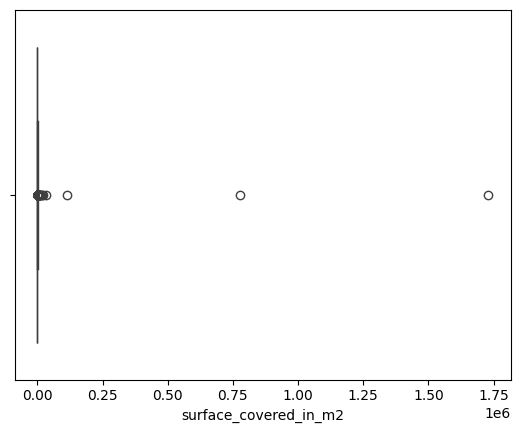

In [18]:
sns.boxplot(x="surface_covered_in_m2",data= df);

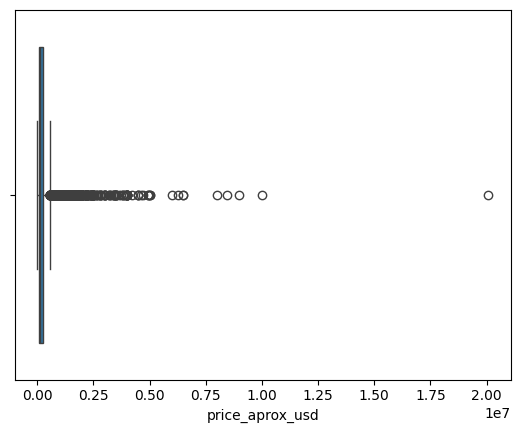

In [19]:
sns.boxplot(x="price_aprox_usd",data= df);

In [20]:
q1 = df["surface_covered_in_m2"].quantile(0.25)
q3 = df["surface_covered_in_m2"].quantile(0.75)
iqr = q3-q1
max_range = q3+(1.5*iqr)
df = df[df["surface_covered_in_m2"]<=max_range]

In [21]:
df.isnull().sum()

property_type            0
price_aprox_usd          0
surface_covered_in_m2    0
state                    0
borough                  0
lat                      0
lon                      0
dtype: int64

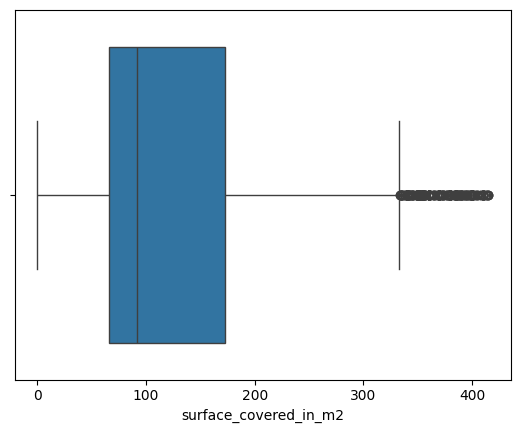

In [22]:
sns.boxplot(x="surface_covered_in_m2",data= df);

In [23]:
df["price_aprox_usd"] = df["price_aprox_usd"] - (df["price_aprox_usd"].mean()/ df["price_aprox_usd"].std())

In [24]:
Q1 = df["price_aprox_usd"].quantile(0.25)
Q3 = df["price_aprox_usd"].quantile(0.75)
IQR= Q3-Q1
MaxRan = Q3 + (1.5*IQR)
df = df[df["price_aprox_usd"]<=MaxRan]

In [25]:
df.head()

,property_type,price_aprox_usd,surface_covered_in_m2,state,borough,lat,lon
0,apartment,289774.949313,54.0,Distrito Federal,Miguel Hidalgo,23.634501,-102.552788
1,house,79661.249313,80.0,Distrito Federal,Iztapalapa,19.310330,-99.068557
2,apartment,48822.109313,100.0,Distrito Federal,Tlalpan,19.279771,-99.234597
3,apartment,337719.649313,135.0,Distrito Federal,Miguel Hidalgo,23.634501,-102.552788
5,apartment,232662.799313,87.0,Distrito Federal,Miguel Hidalgo,19.432657,-99.177444


In [26]:
df.describe()

,price_aprox_usd,surface_covered_in_m2,lat,lon
count,6683.000000,6683.000000,6683.000000,6683.000000
mean,138618.083014,118.685171,19.707560,-97.302818
std,105028.673680,79.582976,0.793828,4.501480
min,6585.099313,0.000000,18.015418,-102.886125
25%,55320.089313,65.000000,19.362690,-99.180757
50%,104845.389313,90.000000,19.399120,-99.149236
75%,192304.949313,150.000000,19.470215,-99.098758
max,476925.039313,415.000000,23.634501,-86.745197


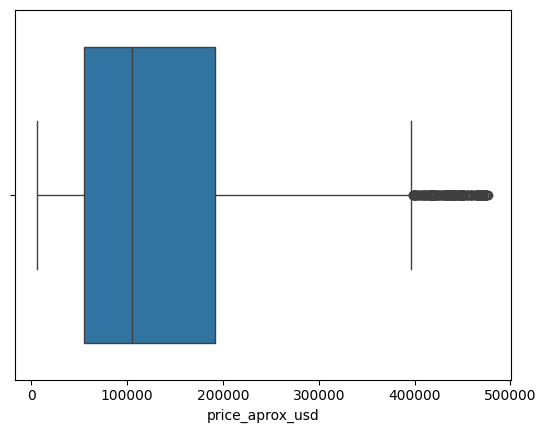

In [27]:
sns.boxplot(x="price_aprox_usd",data= df);

Graphs

In [28]:
df[["surface_covered_in_m2","price_aprox_usd"]].describe()

,surface_covered_in_m2,price_aprox_usd
count,6683.000000,6683.000000
mean,118.685171,138618.083014
std,79.582976,105028.673680
min,0.000000,6585.099313
25%,65.000000,55320.089313
50%,90.000000,104845.389313
75%,150.000000,192304.949313
max,415.000000,476925.039313


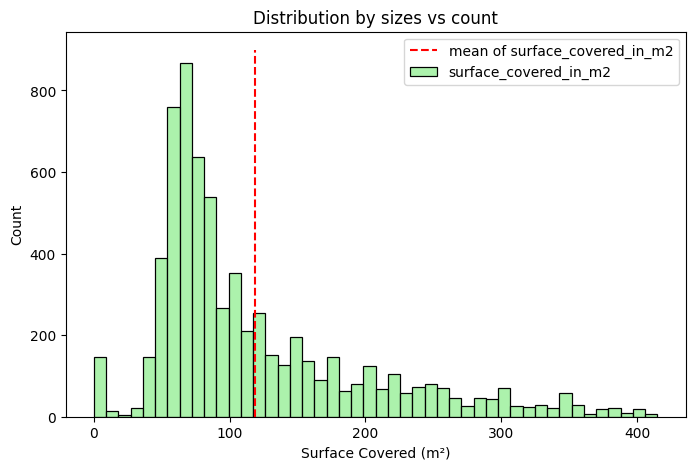

In [29]:
plt.figure(figsize=(8, 5))
sns.histplot(x= "surface_covered_in_m2", data= df, color='lightgreen', edgecolor='black', label="surface_covered_in_m2")
plt.xlabel("Surface Covered (m²)")
plt.ylabel("Count")
plt.title("Distribution by sizes vs count")
mn = np.mean(df["surface_covered_in_m2"])
plt.plot([mn for i in range(0,900)], [i for i in range(0,900)], "r--", label="mean of surface_covered_in_m2")
plt.legend()
plt.show()

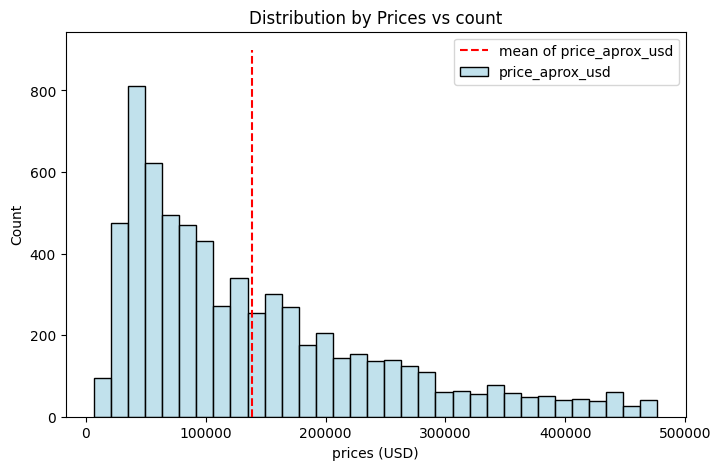

In [30]:
plt.figure(figsize=(8, 5))
sns.histplot(x= "price_aprox_usd", data= df, color='lightblue', edgecolor='black', label="price_aprox_usd")
plt.xlabel("prices (USD)")
plt.ylabel("Count")
plt.title("Distribution by Prices vs count")
mn = np.mean(df["price_aprox_usd"])
plt.plot([mn for i in range(0,900)], [i for i in range(0,900)], "r--", label="mean of price_aprox_usd")
plt.legend()
plt.show()

<font size="+3"><strong>1.4. Location or Size: What Influences House Prices in Mexico?</strong></font>

# Research Question 1

**Which state is most expensive real estate market?**

In [31]:
mean_price_by_state = df.groupby("state")["price_aprox_usd"].mean().sort_values(ascending= False)
mean_price_by_state

state
Solidaridad         212664.732016
Quintana Roo        193156.429020
Distrito Federal    128960.715252
Othón P. Blanco     126446.845980
Zacatecas            93577.262126
Benito Juárez        66167.507244
Name: price_aprox_usd, dtype: float64

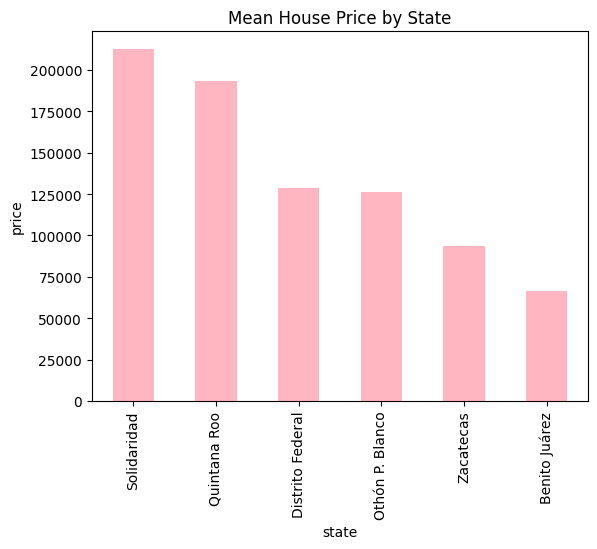

In [32]:
mean_price_by_state.plot(
    kind="bar",
    xlabel="state",
    ylabel="price",
    color = "lightpink",
    title="Mean House Price by State"
);

In [33]:
df["price_per_m2"] = df['price_aprox_usd']/df['surface_covered_in_m2']

In [34]:
df = df[df["surface_covered_in_m2"] != 0]

In [35]:
df.shape

(6542, 8)

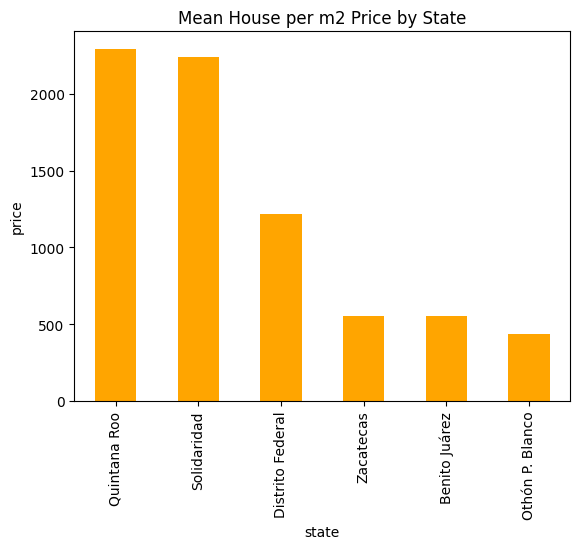

In [36]:
df.groupby("state")["price_per_m2"].mean().sort_values(ascending= False).plot(
    kind="bar",
    xlabel="state",
    ylabel="price",
    color = "orange",
    title="Mean House per m2 Price by State"
);

By this we get to see Solidaridad and Quintana Roo are Top than Federal Distrito:

**Tourism and Luxury Real Estate in Solidaridad and Quintana Roo**

➊ Solidaridad includes Playa del Carmen, and Benito Juárez includes Cancún — two of the most visited international beach destinations in Mexico.

➋ These areas have a strong demand for luxury apartments, resorts, and vacation homes, often targeted at foreign buyers and wealthy investors.

**Distrito Federal (CDMX) has a more diverse housing market:**

➊ CDMX has a wide range of housing options — from upscale Polanco condos to lower-income areas — which brings the average price per m² down.

➋ While luxury areas in CDMX (like Roma, Condesa, Santa Fe) are expensive, many other neighborhoods have more affordable housing, creating a lower average.

# Research Question 2

**Is there a relationship between home size and price?**

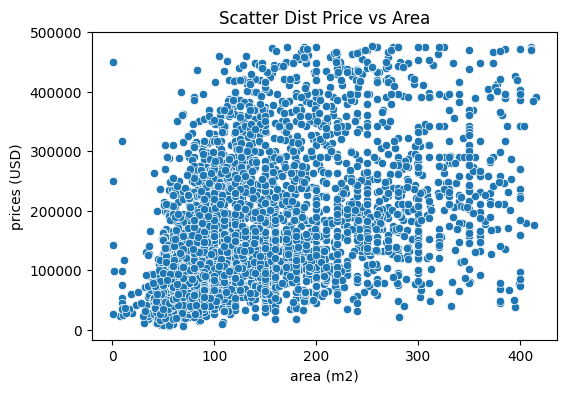

In [37]:
plt.figure(figsize= (6,4))
sns.scatterplot(x="surface_covered_in_m2",y="price_aprox_usd",data= df)
plt.xlabel("area (m2)")
plt.ylabel("prices (USD)")
plt.title("Scatter Dist Price vs Area")
plt.show()

In [38]:
p_correlation = df["surface_covered_in_m2"].corr(df["price_aprox_usd"])
print("Correlation of 'area_m2' and 'price_usd' (all Mexico):", p_correlation)

Correlation of 'area_m2' and 'price_usd' (all Mexico): 0.5388061942865144


Therefore, Moderate correlation

Let us evaluate for Mexico city Distrito Federal 

df_mexico_city shape: (5524, 8)
Correlation of 'area_m2' and 'price_usd' (Mexico City): 54.62006700613086


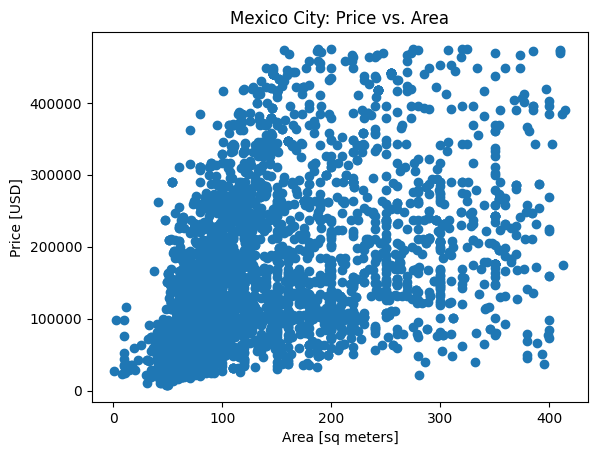

In [39]:
df_mexico_city = df[df["state"]=="Distrito Federal"]
print("df_mexico_city shape:", df_mexico_city.shape)

plt.scatter(df_mexico_city["surface_covered_in_m2"], df_mexico_city["price_aprox_usd"])
plt.xlabel("Area [sq meters]")
plt.ylabel("Price [USD]")
plt.title("Mexico City: Price vs. Area")
            
p_correlation = df_mexico_city["price_aprox_usd"].corr(df_mexico_city["surface_covered_in_m2"]) *100
print("Correlation of 'area_m2' and 'price_usd' (Mexico City):", p_correlation)

Moderate relation

In [40]:
states_corr = {}
list_state = df["state"].unique()
for place in list_state:
    area = df[df["state"]==place]
    p_correlation = area["price_aprox_usd"].corr(area["surface_covered_in_m2"])
    states_corr[place] = float(p_correlation.round(2))

states_corr

{'Distrito Federal': 0.55,
 'Quintana Roo': 0.42,
 'Solidaridad': 0.23,
 'Zacatecas': 0.62,
 'Benito Juárez': 0.77,
 'Othón P. Blanco': 0.94}

### 📊 Correlation Between Price and Area (m²) Across Mexican States

The correlation values between property **price** and **area in square meters (m²)** vary across different states in Mexico. These values reflect how strongly the size of a house influences its price in each region.

#### 🔎 Summary of Correlation Values:
- **Othón P. Blanco**: 0.94
- **Benito Juárez**: 0.77
- **Zacatecas**: 0.62
- **Distrito Federal**: 0.55
- **Quintana Roo**: 0.42
- **Solidaridad**: 0.23

#### 🧠 Interpretation:

- The highest correlation is seen in **Othón P. Blanco (0.94)**, indicating a **very strong relationship** between house size and price — larger houses tend to be much more expensive here.
- **Benito Juárez** and **Zacatecas** also show **strong correlations**, suggesting that **area is a significant factor** in determining price.
- In contrast, **Solidaridad (0.23)** shows a **weak correlation**, implying that **factors other than size** (such as location, amenities, or tourism appeal) may influence prices more heavily.

#### 🏡 Conclusion:

Overall, the correlation data suggests that **in many Mexican states, larger house size often leads to higher prices**, but **the degree of influence varies** by region. In some places, **location plays a more dominant role than size** in determining property value.


<font size="+3"><strong> Predicting Apartment Prices in Mexico City</strong></font>

In [41]:
df.head()

,property_type,price_aprox_usd,surface_covered_in_m2,state,borough,lat,lon,price_per_m2
0,apartment,289774.949313,54.0,Distrito Federal,Miguel Hidalgo,23.634501,-102.552788,5366.202765
1,house,79661.249313,80.0,Distrito Federal,Iztapalapa,19.310330,-99.068557,995.765616
2,apartment,48822.109313,100.0,Distrito Federal,Tlalpan,19.279771,-99.234597,488.221093
3,apartment,337719.649313,135.0,Distrito Federal,Miguel Hidalgo,23.634501,-102.552788,2501.627032
5,apartment,232662.799313,87.0,Distrito Federal,Miguel Hidalgo,19.432657,-99.177444,2674.285050


In [42]:
df.shape

(6542, 8)

In [43]:
mask_apt = df["property_type"] == "apartment"
mask_df = df['state'].str.contains("Distrito Federal")
mask_val = df['price_aprox_usd'] < 100_000
df = df[mask_apt & mask_df & mask_val]

In [44]:
df.shape

(2482, 8)

In [45]:
import plotly.express as px
import plotly.graph_objects as go

C:\Users\admin1\AppData\Local\Temp\ipykernel_28028\3959083624.py:1: DeprecationWarning: *scatter_mapbox* is deprecated! Use *scatter_map* instead. Learn more at: https://plotly.com/python/mapbox-to-maplibre/
  fig = px.scatter_mapbox(


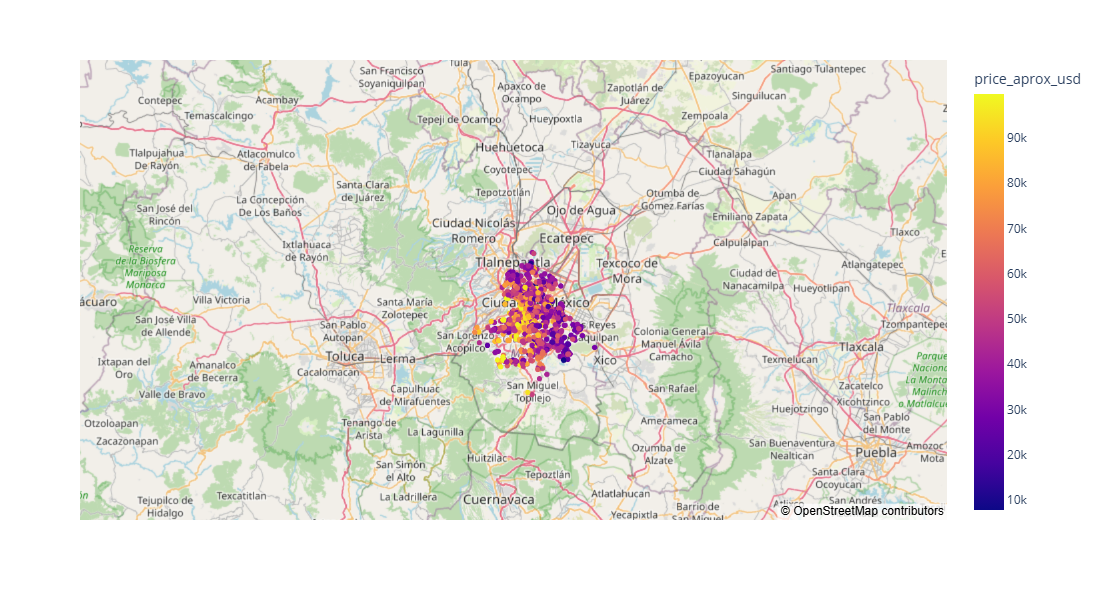

In [46]:
fig = px.scatter_mapbox(
    df,
    lat="lat",
    lon="lon",
    width=800,  # Width of map
    height=600,  # Height of map
    color="price_aprox_usd",
    hover_data=["price_aprox_usd"],  # Display price when hovering mouse over house
)

fig.update_layout(mapbox_style="open-street-map")

fig.show()

In [47]:
target = "price_aprox_usd"
feature = ['surface_covered_in_m2','lat','lon','borough']
X_train = df[feature]
y_train = df[target]

In [49]:
from category_encoders import OneHotEncoder
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.impute import SimpleImputer
from ipywidgets import Dropdown, FloatSlider, IntSlider, interact
from sklearn.metrics import mean_absolute_error
from sklearn.pipeline import make_pipeline
from sklearn.utils.validation import check_is_fitted

In [50]:
model = make_pipeline(
    OneHotEncoder(use_cat_names=True),
    SimpleImputer(),
    Ridge()
    
)
# Fit model
model.fit(X_train, y_train)

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['borough'], use_cat_names=True)),
                ('simpleimputer', SimpleImputer()), ('ridge', Ridge())])

In [51]:
y_pred_training = model.predict(X_train)

print("Training MAE:", mean_absolute_error(y_train, y_pred_training))


Training MAE: 15543.324810386908


In [53]:
coefficients = model.named_steps["ridge"].coef_
features = model.named_steps["onehotencoder"].get_feature_names_out()
print(features)
feat_imp = pd.Series(coefficients, index = features)
feat_imp

['surface_covered_in_m2' 'lat' 'lon' 'borough_Tlalpan'
 'borough_Benito Juárez' 'borough_Iztacalco' 'borough_Azcapotzalco'
 'borough_Coyoacán' 'borough_Cuauhtémoc' 'borough_Álvaro Obregón'
 'borough_Iztapalapa' 'borough_Tláhuac' 'borough_Miguel Hidalgo'
 'borough_Venustiano Carranza' 'borough_Cuajimalpa de Morelos'
 'borough_Gustavo A. Madero' 'borough_Xochimilco'
 'borough_La Magdalena Contreras']


surface_covered_in_m2               105.583914
lat                                -396.166899
lon                               -2706.818032
borough_Tlalpan                    6942.818738
borough_Benito Juárez             13655.013550
borough_Iztacalco                 -1882.441213
borough_Azcapotzalco                948.600724
borough_Coyoacán                   3987.354203
borough_Cuauhtémoc                 -981.193906
borough_Álvaro Obregón             5509.124947
borough_Iztapalapa               -15484.850496
borough_Tláhuac                  -14053.987181
borough_Miguel Hidalgo             1776.365955
borough_Venustiano Carranza       -7681.504287
borough_Cuajimalpa de Morelos     23225.858707
borough_Gustavo A. Madero         -9065.087180
borough_Xochimilco                 4439.298695
borough_La Magdalena Contreras   -11335.371257
dtype: float64

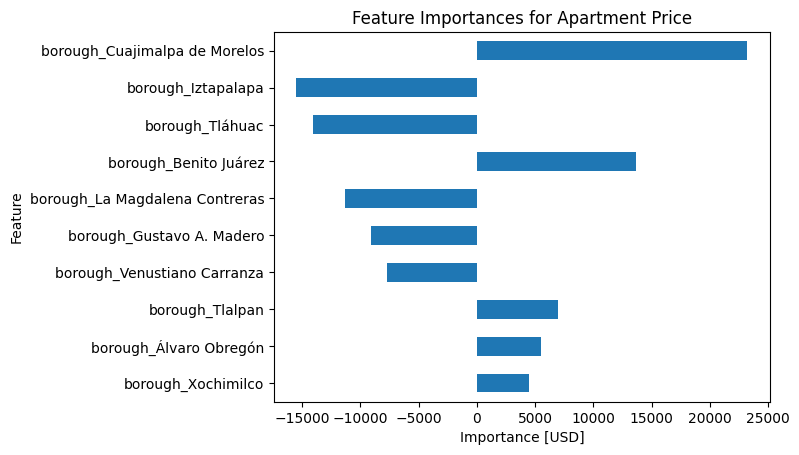

In [54]:
feat_imp.sort_values(key=abs).tail(10).plot(kind="barh")
plt.xlabel("Importance [USD]")
plt.ylabel("Feature")
plt.title("Feature Importances for Apartment Price");


In [55]:
def make_prediction(area, lat, lon, borough):
    data = {
        "surface_covered_in_m2": area,
        "lat": lat,
        "lon": lon,
        "borough": borough
    }
    df = pd.DataFrame(data, index=[0])
    prediction = model.predict(df).round(2)[0]
    return f"Predicted apartment price: ${prediction}"

In [56]:
interact(
    make_prediction,
    area=IntSlider(
        min=X_train["surface_covered_in_m2"].min(),
        max=X_train["surface_covered_in_m2"].max(),
        value=X_train["surface_covered_in_m2"].mean(),
    ),
    lat=FloatSlider(
        min=X_train["lat"].min(),
        max=X_train["lat"].max(),
        step=0.01,
        value=X_train["lat"].mean(),
    ),
    lon=FloatSlider(
        min=X_train["lon"].min(),
        max=X_train["lon"].max(),
        step=0.01,
        value=X_train["lon"].mean(),
    ),
    borough=Dropdown(options=sorted(X_train["borough"].unique())),
);

interactive(children=(IntSlider(value=71, description='area', max=400, min=1), FloatSlider(value=19.4652304618…